In [1]:
import sys
sys.path


['/opt/anaconda3/envs/neuroimagingenv/lib/python36.zip',
 '/opt/anaconda3/envs/neuroimagingenv/lib/python3.6',
 '/opt/anaconda3/envs/neuroimagingenv/lib/python3.6/lib-dynload',
 '',
 '/opt/anaconda3/envs/neuroimagingenv/lib/python3.6/site-packages',
 '/opt/anaconda3/envs/neuroimagingenv/lib/python3.6/site-packages/IPython/extensions',
 '/Users/ralfschmaelzle/.ipython']

In [2]:
#!pip install nest-asyncio

In [12]:
#reminder reprocess sub-CN018, CN019, FR001

In [13]:
import nest_asyncio
nest_asyncio.apply()
#__import__('IPython').embed()

In [14]:
#import openneuro as on
#on.download(dataset    = 'ds003643', 
#            target_dir = 'data/bids',
#            include    = 'derivatives/sub-CN018')



In [15]:
import glob 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
from nilearn import input_data, datasets
from nilearn import datasets, plotting
from nilearn.image import new_img_like, load_img, get_data

In [16]:
shen_dictionary = np.load('/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/narratives_pieman/data_pieman//shen_dictionary.npy', allow_pickle = True).item()
shen_file       = '/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/narratives_pieman/data_pieman//shen_2mm_268_parcellation.nii'

path              = "/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/bids/derivatives"

target_dir        = '/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/extract_ts/'
relevant_columns  = ['csf','white_matter','trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y','rot_z']



#Shen
shen_masker = input_data.NiftiLabelsMasker(shen_file, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 2.0, 
                                             low_pass    = 0.12 );

#Pauli
subcortex = datasets.fetch_atlas_pauli_2017()
pauli_masker = input_data.NiftiMapsMasker(subcortex.maps, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 2.0, 
                                             low_pass    = 0.12 );



#AAN
aan = '/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/narratives_pieman/data_pieman/AAN_MNI152_1mm_v1p0/AAN_Combined_Labels.nii'
aan_masker = input_data.NiftiMapsMasker(   aan, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 2.0, 
                                             low_pass    = 0.12 );

In [17]:
search_path = path + "/**/*" + "_space-MNIColin27_desc-preproc_bold.nii.gz"
print(search_path)
text_files = glob.glob(search_path, recursive = True)
print(text_files[:1])
print(len(text_files))

/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/bids/derivatives/**/*_space-MNIColin27_desc-preproc_bold.nii.gz
['/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/bids/derivatives/sub-EN109/func/sub-EN109_task-lppEN_run-13_space-MNIColin27_desc-preproc_bold.nii.gz']
1023


In [18]:
subjs = []
subjs_runs = []
for i in range(len(text_files)):
        curr= text_files[i][103:130]
        subjs.append(curr.split('_')[0])
        subjs_runs.append(curr)
print(subjs)

['sub-EN109', 'sub-EN109', 'sub-EN109', 'sub-EN109', 'sub-EN109', 'sub-EN109', 'sub-EN109', 'sub-EN109', 'sub-EN109', 'sub-CN027', 'sub-CN027', 'sub-CN027', 'sub-CN027', 'sub-CN027', 'sub-CN027', 'sub-CN027', 'sub-CN027', 'sub-CN027', 'sub-CN020', 'sub-CN020', 'sub-CN020', 'sub-CN020', 'sub-CN020', 'sub-CN020', 'sub-CN020', 'sub-CN020', 'sub-CN020', 'sub-CN029', 'sub-CN029', 'sub-CN029', 'sub-CN029', 'sub-CN029', 'sub-CN029', 'sub-CN029', 'sub-CN029', 'sub-CN029', 'sub-EN107', 'sub-EN107', 'sub-EN107', 'sub-EN107', 'sub-EN107', 'sub-EN107', 'sub-EN107', 'sub-EN107', 'sub-CN016', 'sub-CN016', 'sub-CN016', 'sub-CN016', 'sub-CN016', 'sub-CN016', 'sub-CN016', 'sub-CN016', 'sub-CN016', 'sub-CN011', 'sub-CN011', 'sub-CN011', 'sub-CN011', 'sub-CN011', 'sub-CN011', 'sub-CN011', 'sub-CN011', 'sub-CN011', 'sub-EN100', 'sub-EN100', 'sub-EN100', 'sub-EN100', 'sub-EN100', 'sub-EN100', 'sub-EN100', 'sub-EN100', 'sub-EN100', 'sub-EN101', 'sub-EN101', 'sub-EN101', 'sub-EN101', 'sub-EN101', 'sub-EN101'

In [19]:
 ## prepare extraction
file_appendix     =   '_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy'
print(file_appendix)
    
bold_file_ending  = '_space-MNIColin27_desc-preproc_bold.nii.gz'
    
from nilearn.image import resample_to_img
import nibabel as nib
s = nib.load(shen_file)

## loop extraction
for curr_count in range(len(subjs)):
        curr_subj = subjs[curr_count]
        curr_subj_run = subjs_runs[curr_count]
        
        #sys.stdout.write(str(curr_subj) + ',')
        sys.stdout.write(str(curr_subj_run) + ',')
        
        outname            = target_dir + curr_subj_run + file_appendix

        if not os.path.exists(outname):
        
            func_filename      = path + '/' + curr_subj + '/func/' + curr_subj_run + bold_file_ending
            f = nib.load(func_filename)

            if (not (f.affine[:,:3] == s.affine[:,:3]).all()):
                fr = resample_to_img(func_filename, shen_file )
            else:
                fr = f
                
            outname            = target_dir + curr_subj_run + file_appendix

            if not os.path.exists(outname):
                time_series1 = shen_masker.fit_transform(fr)
                time_series2 = pauli_masker.fit_transform(fr)
                time_series3 = aan_masker.fit_transform(fr)

                time_series = np.hstack([time_series1, time_series2, time_series3])


                np.save(outname, time_series) 

  

_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy


sub-EN109_task-lppEN_run-13,sub-EN109_task-lppEN_run-12,sub-EN109_task-lppEN_run-14,sub-EN109_task-lppEN_run-11,sub-EN109_task-lppEN_run-10,sub-EN109_task-lppEN_run-09,sub-EN109_task-lppEN_run-08,sub-EN109_task-lppEN_run-06,sub-EN109_task-lppEN_run-07,sub-CN027_task-lppCN_run-07,sub-CN027_task-lppCN_run-06,sub-CN027_task-lppCN_run-10,sub-CN027_task-lppCN_run-11,sub-CN027_task-lppCN_run-08,sub-CN027_task-lppCN_run-09,sub-CN027_task-lppCN_run-05,sub-CN027_task-lppCN_run-12,sub-CN027_task-lppCN_run-13,sub-CN020_task-lppCN_run-05,sub-CN020_task-lppCN_run-12,sub-CN020_task-lppCN_run-13,sub-CN020_task-lppCN_run-07,sub-CN020_task-lppCN_run-06,sub-CN020_task-lppCN_run-10,sub-CN020_task-lppCN_run-11,sub-CN020_task-lppCN_run-08,sub-CN020_task-lppCN_run-09,sub-CN029_task-lppCN_run-07,sub-CN029_task-lppCN_run-06,sub-CN029_task-lppCN_run-10,sub-CN029_task-lppCN_run-11,sub-CN029_task-lppCN_run-08,sub-CN029_task-lppCN_run-09,sub-CN029_task-lppCN_run-05,sub-CN029_task-lppCN_run-12,sub-CN029_task-lppCN

In [11]:
func_filename

'/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/bids/derivatives/sub-FR001/func/sub-FR001_task-lppFR_run-07_space-MNIColin27_desc-preproc_bold.nii.gz'

In [17]:
cd = np.load('/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/extract_ts/sub-EN109_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy')

In [18]:
cd.shape

(292, 293)

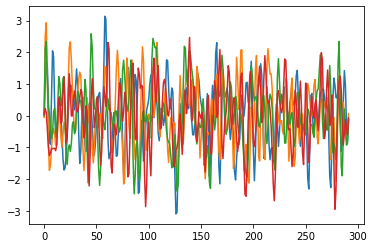

In [28]:
import matplotlib.pyplot as plt
plt.plot(cd[:,np.arange(0,293,90)]);

In [17]:
func_filename

'/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/bids/derivatives/sub-FR027/func/sub-FR027_task-lppFR_run-01_space-MNIColin27_desc-preproc_bold.nii.gz'

In [18]:
import nibabel as nib
f = nib.load(func_filename)

s = nib.load(shen_file)

In [19]:
f.affine

array([[   2.        ,   -0.        ,   -0.        ,  -71.99999237],
       [  -0.        ,    2.        ,   -0.        , -106.        ],
       [   0.        ,    0.        ,    2.        ,  -63.99999619],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [20]:
s.affine

array([[  -2.,   -0.,   -0.,   90.],
       [  -0.,    2.,   -0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [21]:
from nilearn.image import resample_to_img
fr = resample_to_img(f,shen_file )

In [23]:
fr.affine

array([[  -2.,   -0.,   -0.,   90.],
       [  -0.,    2.,   -0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [24]:
f.affine == s.affine

array([[False,  True,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]])

In [38]:
(fr.affine[:,:3] == s.affine[:,:3]).all()

True

In [27]:
fr.affine[:,:3]

array([[-2., -0., -0.],
       [-0.,  2., -0.],
       [ 0.,  0.,  2.],
       [ 0.,  0.,  0.]])